In [ ]:
# Hyperparameter Tuning with Scikit-Learn wine

In [1]:
import pandas as pd

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

# Set column names based on dataset description
df.columns = ["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids",
              "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]

df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Handle missing values
df.fillna(0, inplace=True)

# Check the number of unique values in each column
print(df.nunique())

# Encoding the target column
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the binary column
df['class'] = le.fit_transform(df['class'])

# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

# Split the data
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class                             3
alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64
{1: 0, 2: 1, 3: 2}


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
baseline_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
print(f"Default Model Accuracy: {baseline_score:.4f}")

Default Model Accuracy: 0.8929


In [4]:
#?clf

In [5]:
# hyperparameter tuning
for depth in [1, 2, 3, 4, 5, 6, 7, 8]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    print(f"Max Depth {depth}, Accuracy: {score:.4f}")

Max Depth 1, Accuracy: 0.6057
Max Depth 2, Accuracy: 0.8510
Max Depth 3, Accuracy: 0.8857
Max Depth 4, Accuracy: 0.8929
Max Depth 5, Accuracy: 0.8929
Max Depth 6, Accuracy: 0.8929
Max Depth 7, Accuracy: 0.8929
Max Depth 8, Accuracy: 0.8929


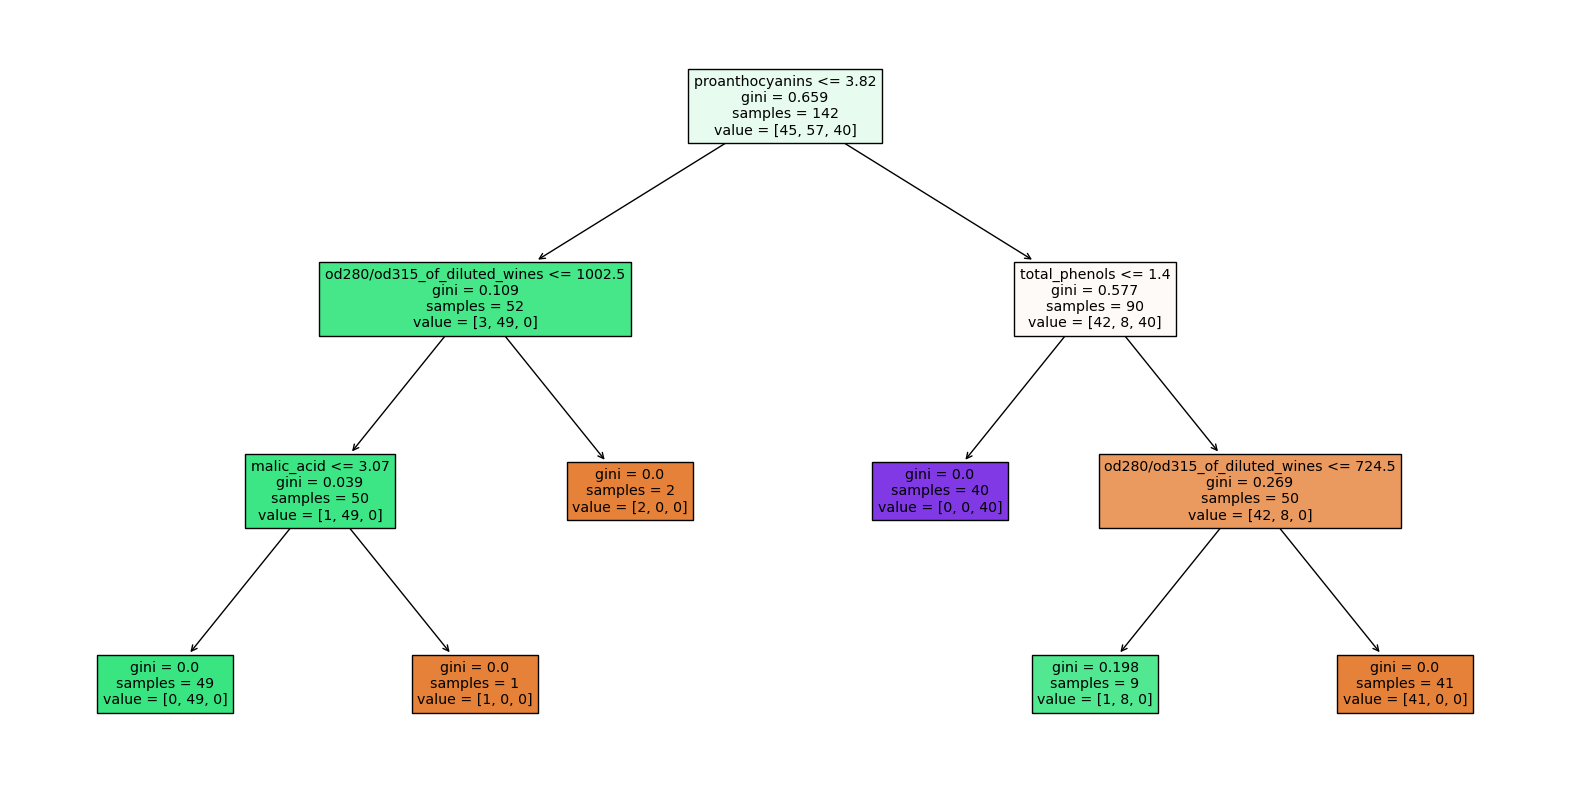

In [6]:
# Visualizing the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt

best_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust based on best parameters
best_clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(best_clf, filled=True, feature_names=df.columns[:-1])
plt.show()